# Load dos Dados

In [0]:
import pandas as pd

data = pd.read_csv('http://s3.amazonaws.com/automl-example/produtos.csv', encoding='utf-8', delimiter=';')

In [71]:
data.describe()

,nome,descricao,categoria
count,4080,2916,4080
unique,3696,2460,4
top,Mais Escuro - Cinquenta Tons Mais Escuros Pel...,JOGO ORIGINAL. NOVO. LACRADO. PRONTA ENTREGA. ...,livro
freq,20,39,1020


# Entendimento dos Dados

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 3 columns):
nome         4080 non-null object
descricao    2916 non-null object
categoria    4080 non-null object
dtypes: object(3)
memory usage: 95.7+ KB


In [73]:
data.isnull().sum()/data.shape[0]

nome         0.000000
descricao    0.285294
categoria    0.000000
dtype: float64

In [0]:
data.dropna(inplace=True)

In [31]:
data.shape

(2916, 3)

In [46]:
data['categoria'].value_counts()

livro        838
maquiagem    788
brinquedo    668
game         622
Name: categoria, dtype: int64

In [50]:
data.head(5)

,nome,descricao,categoria
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro


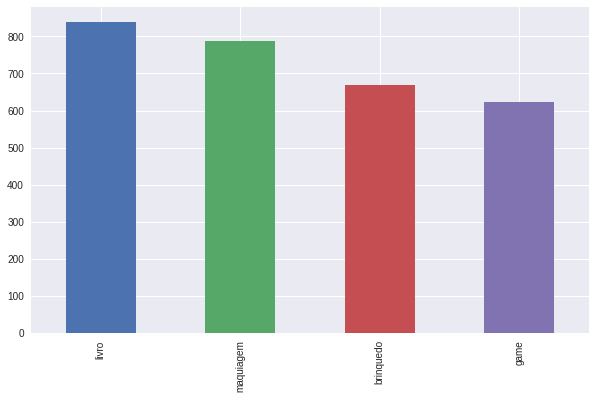

In [80]:
data['categoria'].value_counts().plot(kind='bar', figsize=(10,6))

# Tokenizar

In [82]:
from collections import Counter

c = Counter()
data.descricao.str.lower().str.split(" ").apply(c.update)

c.most_common(10)

[('de', 23835),
 ('e', 15774),
 ('o', 12238),
 ('a', 11905),
 ('do', 8657),
 ('para', 7913),
 ('em', 6798),
 ('que', 6770),
 ('-', 6220),
 ('com', 6099)]

# Word Cloud

In [0]:
import nltk
import matplotlib.pyplot as plt

try:
  from wordcloud import WordCloud
except:
  !pip install wordcloud

In [0]:
livro_words = ''

livro = data[data.categoria == 'livro']

for val in livro.descricao:
  text = val.lower()
  for words in text:
    livro_words = livro_words + words

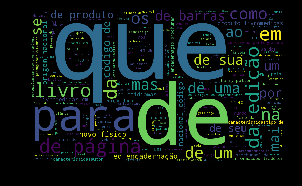

In [88]:
livro_wordcloud = WordCloud(width=1000, height=600).generate(livro_words)

plt.figure(figsize=(4,4), facecolor='k')
plt.imshow(livro_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()